In [1]:
import numpy as np
import matplotlib.pyplot as plt

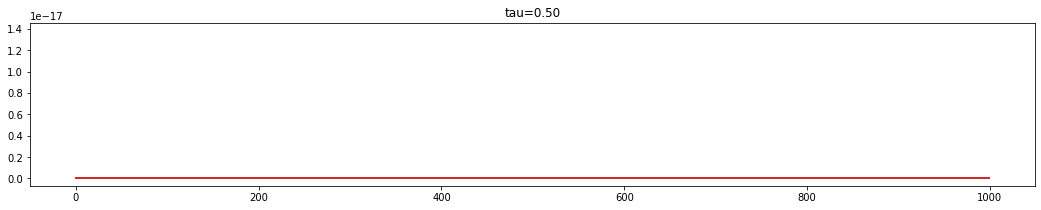

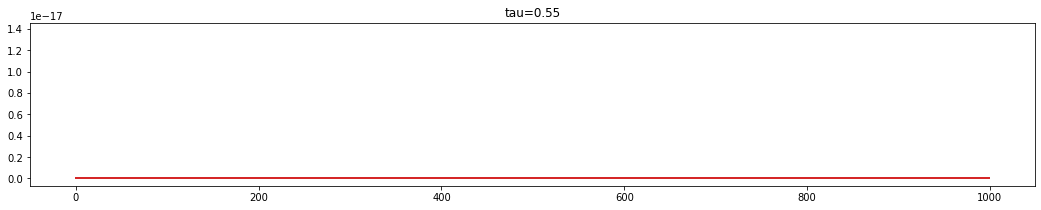

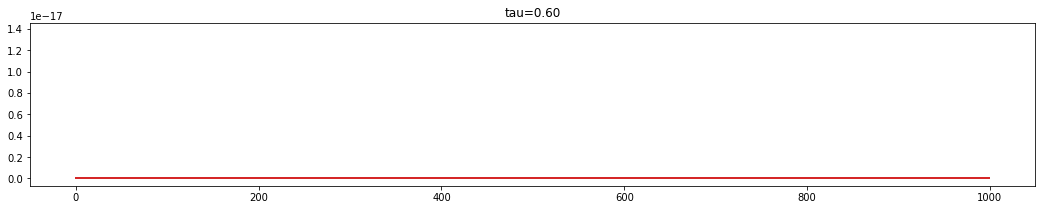

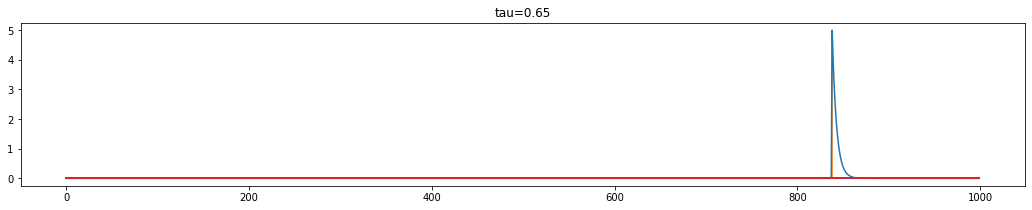

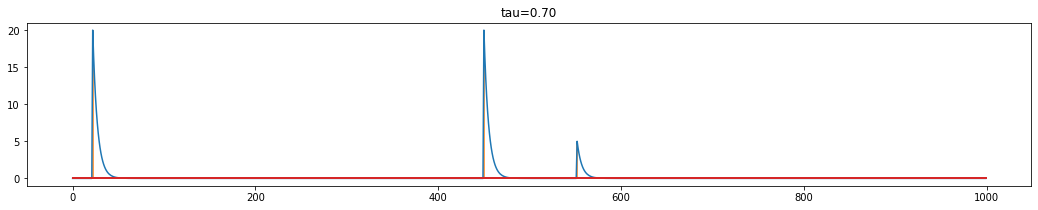

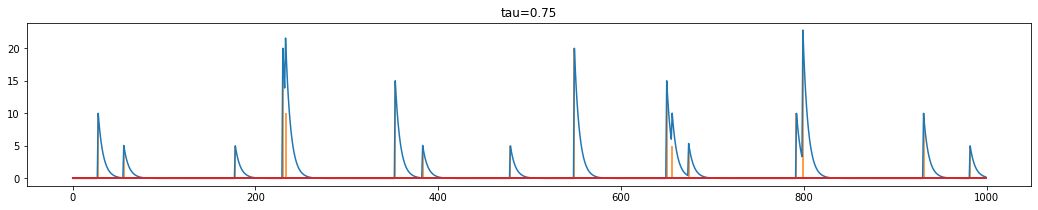

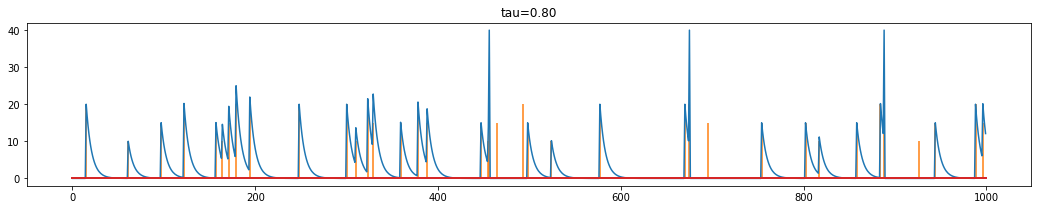

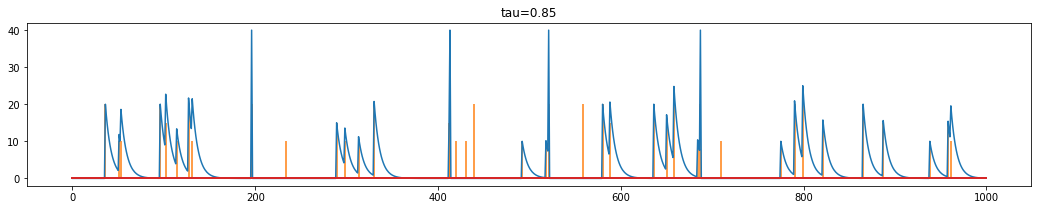

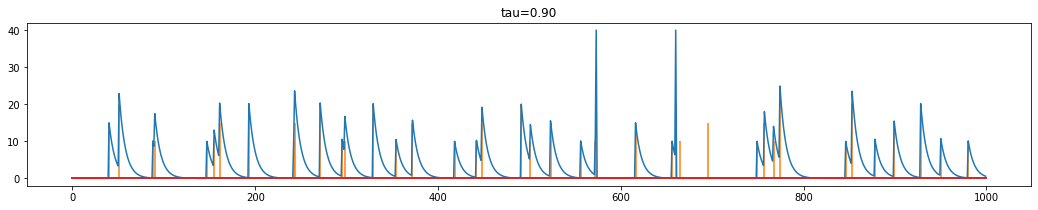

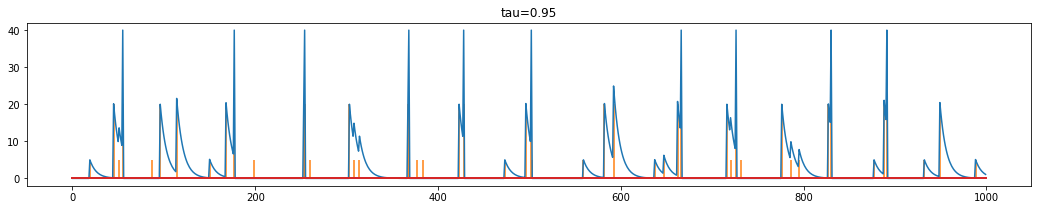

In [2]:
global Pref, Pmin, Pth, D, Pspike, time, T, dt

for tau_ in np.arange(0.5,1.0,0.05):

    T = 500
    dt = 0.125
    Pref = 0
    Pmin = -1
    Pth = 25
    #D = 0.25
    R = 5
    tau = tau_
    Pspike = 40
    t_ref = 5

    time = np.arange(0, T+dt, dt)

    class SimpleNeuron:
        def __init__(self,):
            self.t_rest = 0
            self.Pn = np.zeros(len(time))
            self.spike = np.zeros(len(time))
        def out(self,S,w): # S: Spike Matrix, w: Weight
            for i,t in enumerate(time):
                if i==0: # Initialize
                    a1 = S[:,i] # Spikes of Presynaptic Neurons at timestep i 
                    self.Pn[i] = np.dot(w,a1)
                    self.spike[i] = 0
                else:
                    if t<=self.t_rest: # In Refractory Period
                        self.Pn[i] = Pref
                        self.spike[i] = 0
                    elif t>self.t_rest: # Active
                        if self.Pn[i-1]>Pmin: #Not Hyperpolaruzed
                            a1 = S[:,i] # Spikes of Presynaptic Neurons at timestep i 
                            self.Pn[i] = self.Pn[i-1] + (R*np.dot(w,a1)) - (dt/tau*(self.Pn[i-1]-Pref))
                            self.spike[i] = 0
                        else: # Hyperpolarized
                            self.Pn[i] = 0
                            self.spike[i] = 0
                    if self.Pn[i]>=Pth: # Spike
                        self.Pn[i] = Pspike
                        self.t_rest = t + t_ref
                        self.spike[i] = 1
            return self.spike

    # Initialize Layer

    n1 = 5 # of neurons in 1st layer
    n2 = 3 # of neurons in 2nd layer

    layer1 = []
    layer2 = []

    for i in range(n1):
        a = SimpleNeuron()
        layer1.append(a)
    for j in range(n2):
        a = SimpleNeuron()
        layer2.append(a)

    # Initialize synaptic weight

    w01 = np.eye(n1)
    w12 = np.random.randint(0,5,size=(n1,n2))

    # Initialize random input

    S_input = np.random.randint(0,2,size=(n1,len(time)))

    S1=[]
    S2=[]
    for i,neuron in enumerate(layer1):
        S1.append(neuron.out(S_input,w01[i]))
    S1=np.stack(S1)
    for i,neuron in enumerate(layer2):
        S2.append(neuron.out(S1,w12[:,i]))
    S2=np.stack(S2)



    start = 0
    end = 1000
    post = 0

    pre_neurons = layer1
    post_neuron = layer2[post]

    plt.figure(figsize=(18,3))
    plt.plot(post_neuron.Pn[start:end])
    for i,neuron in enumerate(pre_neurons):
        plt.stem(neuron.spike[start:end]*w12[i,post]*5,markerfmt=" ",linefmt='C1-')
    plt.title(f"tau={tau:.2f}")
    plt.show()